In [46]:
import pandas as pd
import numpy as np
import process_data as prc
import matplotlib.pyplot as plt

In [47]:
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250213_2p87v_254nm_50Hz_DecayConstant_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_open_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250214_2p83v_254nm_1Hz_DecayConstant_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250214_2p83v_254nm_1Hz_DecayConstant_shutter_open_run0_raw_b0_seg0.h5py'
file =  'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p6ms_shutter_on_run0_raw_b0_seg0.h5py'
# file =  'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p7ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p65ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p68ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p63ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p8ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_28p0ms_shutter_on_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_29p0ms_shutter_on_run0_raw_b0_seg0.h5py'

df = pd.read_hdf(file, key='winfo')


In [48]:
df.head()

,Ch,TTT,Baseline,Area,Hight,Width,st,ed,md,RunType,Voltage,RunTag,Ftag
0,0,63623,15186,86,76,5,18,23,20,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
1,0,164064,15186,93,47,4,18,22,20,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
2,0,2177146,15185,66,63,3,18,21,20,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
3,0,3904115,15186,96,61,3,19,22,20,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
4,0,4847478,15187,83,74,3,18,21,20,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...


In [49]:
len(df)/  ((df.TTT.max() - df.TTT.min()) *4.E-9)

494.29825934562155

In [50]:
height = []
for idx, row in df.iterrows():
    entry = row['Hight']  
    height.append(entry)

In [6]:
Areas = []
for idx, row in df.iterrows():
    entry = row['Area']  
    Areas.append(entry)

In [7]:
import pickle
with open(f'outnpy/shutter_on_27p6ms_height.pkl', 'rb') as f:
    h_27p6 =pickle.load(f)
with open(f'outnpy/shutter_on_27p7ms_height.pkl', 'rb') as f:
    h_27p7 =pickle.load(f)
with open(f'outnpy/shutter_on_27p68ms_height.pkl', 'rb') as f:
    h_27p68= pickle.load(f)
with open(f'outnpy/shutter_on_27p65ms_height.pkl', 'rb') as f:
    h_27p65= pickle.load(f)
with open(f'outnpy/shutter_on_27pms_open_height.pkl', 'rb') as f:
    h_27p_op= pickle.load(f)
with open(f'outnpy/shutter_on_27p63ms_open_height.pkl', 'rb') as f:
    h_27p63=pickle.load(f)

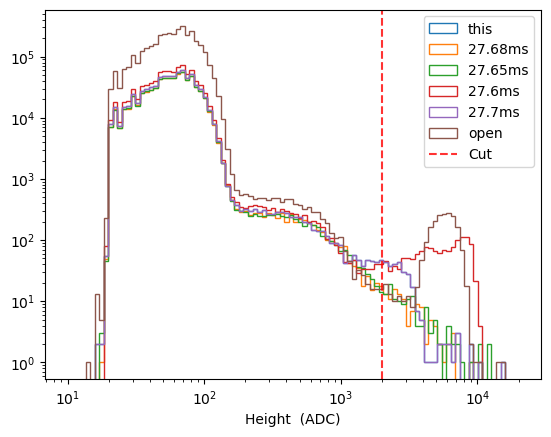

In [8]:
start = 1e1
end = 2e4
num_bins = 100
bins = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
import pickle
# with open(f'outnpy/shutter_on_27p63ms_open_height.pkl', 'wb') as f:
#     pickle.dump(height, f)
plt.hist(height,bins=bins,histtype='step',log=True,label='this')
plt.hist(h_27p68,bins=bins,histtype='step',log=True,label='27.68ms')
plt.hist(h_27p65,bins=bins,histtype='step',log=True,label='27.65ms')
plt.hist(h_27p6,bins=bins,histtype='step',log=True, label='27.6ms')
plt.hist(h_27p7,bins=bins,histtype='step',log=True, label='27.7ms')
plt.hist(h_27p_op,bins=bins,histtype='step',log=True,label='open')

plt.axvline(x=2E3, color='red',alpha=0.8, linestyle='--', label='Cut')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height  (ADC)')
plt.legend()
plt.show()

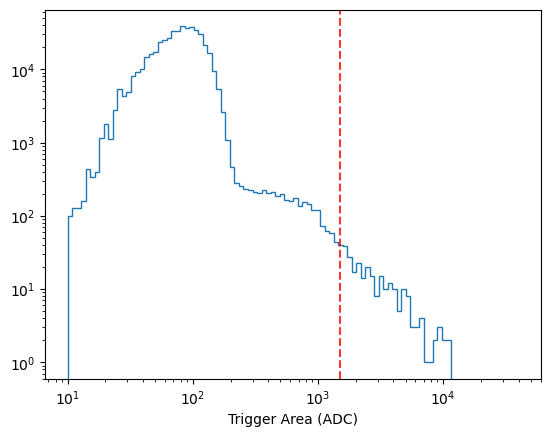

In [161]:
start = 1e1
end = 4.e4
num_bins = 100
bins = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
plt.hist(Areas,bins=bins,histtype='step',log=True)
plt.axvline(x=1.5E3, color='red',alpha=0.8, linestyle='--', label='Cut')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Trigger Area (ADC)')
plt.show()

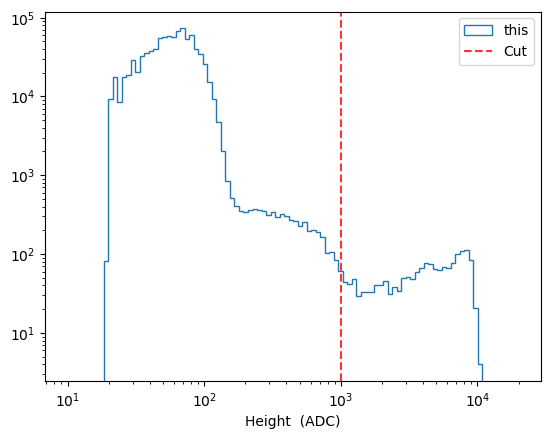

In [51]:
start = 1e1
end = 2e4
num_bins = 100
bins = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
plt.hist(height,bins=bins,histtype='step',log=True,label='this')

plt.axvline(x=1E3, color='red',alpha=0.8, linestyle='--', label='Cut')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Height  (ADC)')
plt.legend()
plt.show()

In [52]:
cut_value = 1000
cut = df['Hight'] > cut_value
df_c = df[cut]
len(df_c)/(((df.TTT.max() - df.TTT.min())) *4.E-9)

0.9570630471121919

In [53]:
df_c.head()

,Ch,TTT,Baseline,Area,Hight,Width,st,ed,md,RunType,Voltage,RunTag,Ftag
74,0,37628544,15186,1818,1440,4,19,23,21,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
455,0,210740408,15186,21126,8763,11,17,28,22,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
719,0,325273710,15186,11004,9063,6,18,24,21,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
998,0,460738728,15185,21344,9056,10,19,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
1576,0,710737050,15185,19918,8809,12,17,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...


In [54]:
dtt = np.diff(df_c.TTT)
dtt = np.array(dtt)*4.E-9
dtt, np.mean(dtt), np.std(dtt)


(array([0.69244746, 0.45813321, 0.54186007, ..., 0.99999332, 0.99999332,
        0.99999332]),
 1.0435200716783217,
 0.8711743118384427)

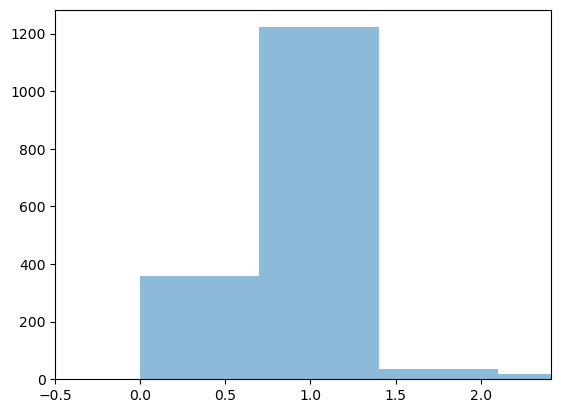

In [55]:
plt.hist(dtt, bins=10, density=False, alpha=0.5, label='TTT')
plt.xlim(-0.5, np.mean(dtt)+np.std(dtt) +0.5)
plt.show()

In [56]:
import pandas as pd
import numpy as np

def filter_dataframe(df):
    # 计算相邻 TTT 的差值并转换为秒
    dtt = np.diff(df['TTT'].values) * 4e-9
    
    if len(dtt) == 0:
        return df.iloc[[]]  # 空数据直接返回
    
    # 计算均值标准差范围
    # mean_dtt = np.mean(dtt)
    mean_dtt = 1.0
    std_dtt = np.minimum(np.std(dtt), 0.1)
    lower_bound = mean_dtt - std_dtt
    upper_bound = mean_dtt + std_dtt
    
    # 找到符合条件的间隔索引
    valid_indices = np.where((dtt >= lower_bound) & (dtt <= upper_bound))[0]
    
    # 收集所有关联的行索引（去重）
    selected_rows = set()
    for i in valid_indices:
        selected_rows.add(i)
        selected_rows.add(i+1)
    
    # 返回筛选后的 DataFrame
    return df.iloc[sorted(selected_rows)]

# # 示例用法
# df = pd.DataFrame({'TTT': [0, 250000000, 500000000, 750000001, 1000000000]})
# filtered_df = filter_dataframe(df)
# print(filtered_df)

In [57]:
df_led = filter_dataframe(df_c)

In [58]:
df_led.head()

,Ch,TTT,Baseline,Area,Hight,Width,st,ed,md,RunType,Voltage,RunTag,Ftag
998,0,460738728,15185,21344,9056,10,19,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
1576,0,710737050,15185,19918,8809,12,17,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
2121,0,960735370,15186,20509,8144,12,17,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
2715,0,1210733690,15186,21482,9194,11,18,29,23,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...
3240,0,1460732010,15186,17868,7502,10,19,29,22,DecayConstant,2.83,DecayConstant_Delay_27p6ms_shutter_on,lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_2...


In [59]:
dtt = np.diff(df_led.TTT)
dtt = np.array(dtt)*4.E-9
dtt, np.mean(dtt), np.std(dtt)


(array([0.99999329, 0.99999328, 0.99999328, ..., 0.99999332, 0.99999332,
        0.99999332]),
 1.2935560392364425,
 1.1587671833745237)

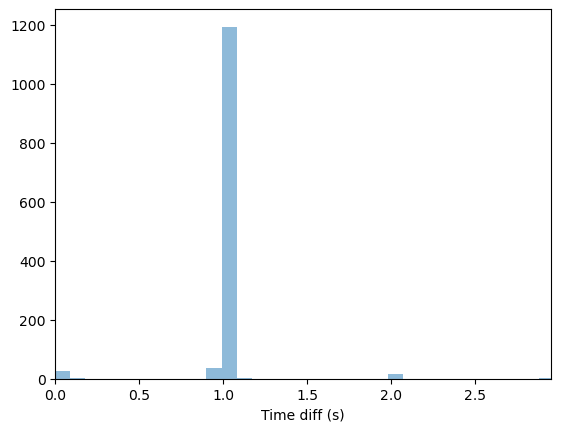

In [60]:
plt.hist(dtt, bins=100, density=False, alpha=0.5, label='TTT')
plt.xlabel('Time diff (s)')
plt.xlim(0 , np.mean(dtt)+np.std(dtt)+0.5)
# plt.xscale('log')
plt.show()

In [20]:
len(df_led), len(df_c)

(24, 307)

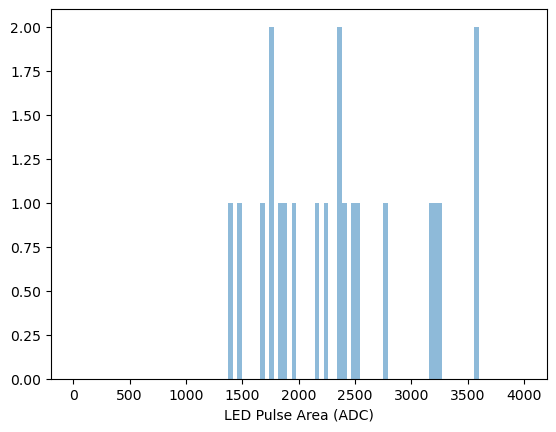

In [21]:
plt.hist(np.array(df_led.Area), bins=np.linspace(1,4.E3,100), density=False,  alpha=0.5, label='Area')
plt.xlabel('LED Pulse Area (ADC)')
plt.show()

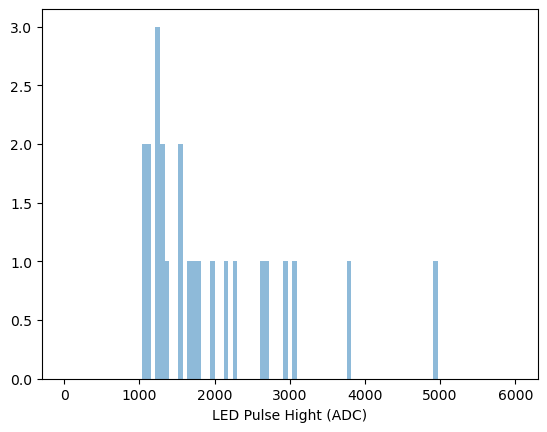

In [22]:
plt.hist(np.array(df_led.Hight), bins=np.linspace(1,6.E3,100), density=False, alpha=0.5, label='Area')
plt.xlabel('LED Pulse Hight (ADC)')
plt.show()

In [23]:
df_post = prc.process_all_segments(df, np.min(df_led.Hight.values))

In [24]:
df_post.head()

,main_ttt,main_area,main_height,main_width,post_events
0,32074873,2065,1695,6,"[{'delay': 573908, 'area': 193, 'height': 129}..."
1,1709100229,5182,4405,5,"[{'delay': 16800, 'area': 26, 'height': 27}, {..."
2,2803966276,2326,1767,4,"[{'delay': 5700, 'area': 49, 'height': 28}, {'..."
3,2999742697,4236,3005,6,"[{'delay': 9576472, 'area': 66, 'height': 55},..."
4,8349601769,1884,1637,6,"[{'delay': 5320300, 'area': 90, 'height': 70},..."


In [25]:
file

'outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_29p0ms_shutter_on_run0_raw_b0_seg0.h5py'

In [26]:
import os
# f_tag = os.path.splitext(file.name)[0]
# f_tag = df_new.file.iloc[0].split('/')[-1].split('.')[0]
f_tag = 'outnpy/'+df.Ftag.iloc[0]
path = r'{}_decaytime_cut_led.h5py'.format(f_tag)
prc.write_to_hdf5(df_post, path)

h5 Write Time: 0.14 s 
h5 File Size: 10.39 MB
Save to outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_29p0ms_shutter_on_run0_raw_b0_seg0_decaytime_cut_led.h5py


/home/yjj/ProcessLocalData/process_data.py:194: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['post_events'], dtype='object')]

  df.to_hdf(filename, key='winfo', mode='w', complib='blosc:blosclz', complevel=9)


(0.13627123832702637, 10892947)

In [27]:
len(df_led)/(((df.TTT.max() - df.TTT.min())) *4.E-9), len(df_led)

(0.013373507078780053, 24)

In [28]:
df_post.post_events[0][0], df_post.post_events[0][0].get('delay')

({'delay': 573908, 'area': 193, 'height': 129}, 573908)

In [29]:
# all_events = df1['post_events'].explode().dropna()
# decays = pd.DataFrame(all_events.tolist())['delay']
# dt = decays.to_numpy(dtype=np.float64)
##############################################
def fast_delay_extractor(df: pd.DataFrame) -> np.ndarray:
    return (
        df['post_events']
        .dropna()
        .explode()
        .apply(pd.Series)
        ['delay']
        .astype(np.float64)
        .values
    )

def calculate_event_rate(dt, time_length, start=1e1, end=1e8, num_bins=100):
    """
    计算对数分箱时间间隔的速率及误差。    
    Args:
        dt (array-like): 时间间隔数据
        num_led (int): 实验参数（如LED数量）
        start (float): 最小时间边界
        end (float): 最大时间边界
        num_bins (int): 分箱数量    
    Returns:
        rate (ndarray): 各时间区间的速率 [单位：counts/(time_unit*LED)]
        rate_error (ndarray): 速率的统计误差
        bins (ndarray): 分箱边界
    """
    # 生成对数分箱
    bins = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
    bin_widths = np.diff(bins)    
    # 统计计数和误差
    counts, _ = np.histogram(dt, bins=bins)
    errors = np.sqrt(counts)    
    # 计算速率（避免除以零）
    with np.errstate(divide='ignore', invalid='ignore'):
        rate = (counts / bin_widths / time_length) * 1e9
        rate_error = (errors / bin_widths / time_length) * 1e9
        rate = np.nan_to_num(rate, nan=0)  # 处理空箱
    
    return rate, rate_error, bins

In [30]:
# f = 'outnpy/lv2414_0DB_lv2415_0DB_combine_20250213_2p87v_254nm_50Hz_DecayConstant_run0_raw_b0_seg0_decaytime.h5py'
# df_decay = pd.read_hdf(f, key='winfo')
# df_decay.head()
# dt = fast_delay_extractor(df_decay)
dt = fast_delay_extractor(df_post)


In [31]:
time_length = 4 * 10*np.max(df.TTT) / 1e9
time_length
# num_led =  1143.70580108

17945.94914292

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


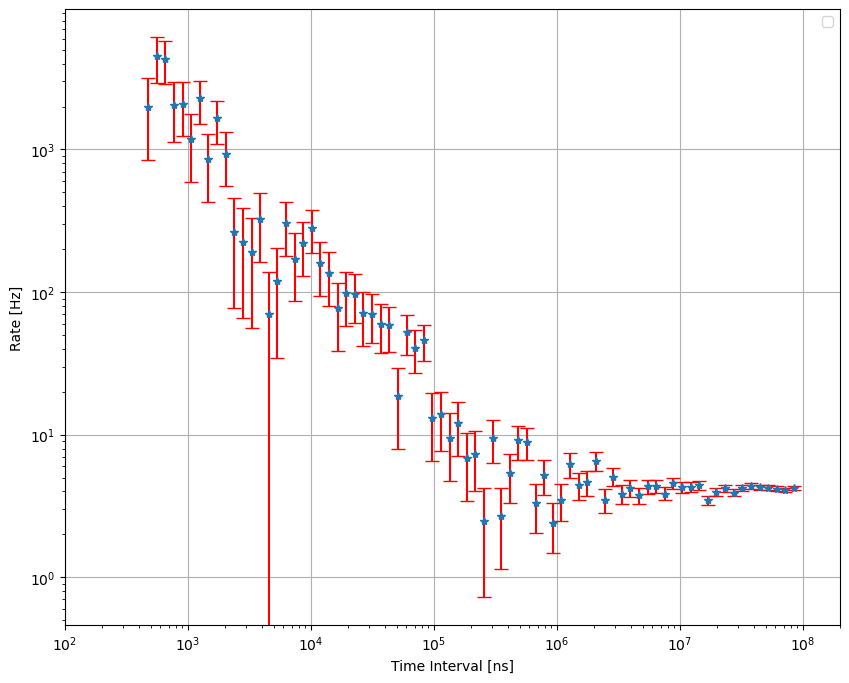

In [32]:
rate, rate_error, bins = calculate_event_rate(dt, time_length)
import matplotlib.pyplot as plt
import pickle
with open(f'{f_tag}_rate.pkl', 'wb') as f:
    pickle.dump(rate, f)
with open(f'{f_tag}_rate_error.pkl', 'wb') as f:
    pickle.dump(rate_error, f)
plt.figure(figsize=(10,8))
plt.errorbar(x=bins[:-1], y=rate, yerr=rate_error, fmt='*', capsize=5, capthick=1, ecolor='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Interval [ns]')
plt.ylabel('Rate [Hz]')
# plt.axvline(3e2, color='black', linestyle='--', label='')
# plt.axvline(1e3, color='grey', linestyle='--', label='$CH^+_4$')
# plt.axvline(2e3, color='grey', linestyle='--', label='$CO^+_2/Ar^+$')
# plt.axvline(5e2, color='grey',alpha=0.5, linestyle='--', label='$He^+$')

plt.xlim(1e2, 2e8)
plt.grid(True)
plt.legend()
plt.show()

In [33]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))
'''
with open('/home/leavepeople/ghs2/1inch_2415/1.7V_15_ns_1_inch_rate.pkl', 'rb') as file:
    loaded_rate = pickle.load(file)
with open('/home/leavepeople/ghs2/1inch_2415/1.7V_15_ns_1_inch_rate_error.pkl', 'rb') as file:
    loaded_rate_error = pickle.load(file)

with open('decayrate/2.83V_50_ns_254nm_no_delay_shutter_on_1inch_my_method_rate.pkl', 'rb') as f:
    rate_shutter_on = pickle.load(f)
with open('decayrate/2.83V_50_ns_254nm_no_delay_shutter_on_1inch_my_method_rate_error.pkl', 'rb') as f:
    rate_shutter_on_error = pickle.load(f)
''' 
with open('decayrate/2.83V_50_ns_254nm_no_delay_shutter_open_1inch_my_method_rate.pkl', 'rb') as f:
    rate_shutter_open = pickle.load(f)
with open('decayrate/2.83V_50_ns_254nm_no_delay_shutter_open_1inch_my_method_rate_error.pkl', 'rb') as f:
    rate_shutter_open_error = pickle.load(f)


# with open('decayrate/2.83V_50_ns_254nm_delay_27.5ms_shutter_open_1inch_my_method_rate.pkl', 'rb') as f:
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_open_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_27_5ms = pickle.load(f)
# with open('decayrate/2.83V_50_ns_254nm_delay_27.5ms_shutter_open_1inch_my_method_rate_error.pkl', 'rb') as f:
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_open_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_27_5ms_error = pickle.load(f)
    
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_on_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_27_5ms_shutter_on = pickle.load(f)
# with open('decayrate/2.83V_50_ns_254nm_delay_27.5ms_shutter_on_1inch_my_method_rate_error.pkl', 'rb') as f:
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p5ms_shutter_on_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_27_5ms_shutter_on_error = pickle.load(f)
'''

with open('decayrate/2.83V_50_ns_254nm_50Hz_1inch_my_method_rate.pkl', 'rb') as file:
    rate_50Hz = pickle.load(file)
with open('decayrate/2.83V_50_ns_254nm_50Hz_1inch_my_method_rate_error.pkl', 'rb') as file:
    rate_50Hz_error = pickle.load(file)
'''
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p6ms_shutter_on_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_27_6ms = pickle.load(f)
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p6ms_shutter_on_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_27_6ms_error = pickle.load(f)

with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p8ms_shutter_on_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_27_8ms = pickle.load(f)
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_27p8ms_shutter_on_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_27_8ms_error = pickle.load(f)
    
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_28p0ms_shutter_on_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_28_0ms = pickle.load(f)
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_28p0ms_shutter_on_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_28_0ms_error = pickle.load(f)
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_29p0ms_shutter_on_run0_raw_b0_seg0_rate.pkl', 'rb') as f:
    rate_delay_29_0ms = pickle.load(f)
with open('outnpy/lv2414_0DB_lv2415_0DB_combine_20250216_2p83v_254nm_1Hz_DecayConstant_Delay_29p0ms_shutter_on_run0_raw_b0_seg0_rate_error.pkl', 'rb') as f:
    rate_delay_29_0ms_error = pickle.load(f)

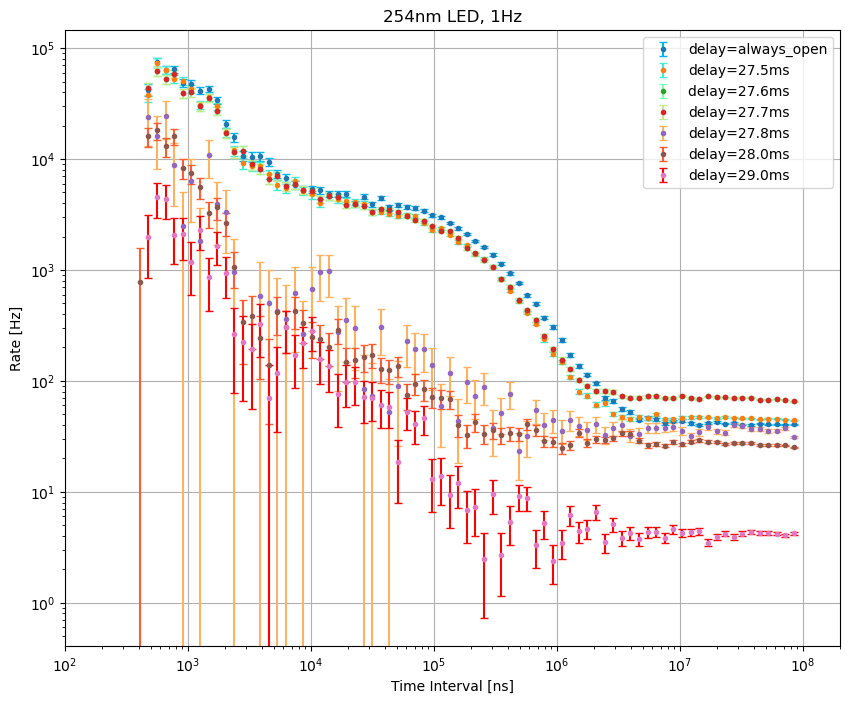

In [34]:
start = 1e1
end = 1e8
num_bins = 100
bins = np.logspace(np.log10(start), np.log10(end), num_bins + 1)

plt.figure(figsize=(10,8))
# plt.errorbar(x=bins[:-1], y=rate_shutter_on, yerr=rate_shutter_on_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[0], label='Shutter On(27ms)')
# plt.errorbar(x=bins[:-1], y=rate_shutter_open, yerr=rate_shutter_open_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[1], label='delay=always_open')
plt.errorbar(x=bins[:-1], y=rate_delay_27_5ms, yerr=rate_delay_27_5ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[2], label='delay=always_open')
plt.errorbar(x=bins[:-1], y=rate_delay_27_5ms_shutter_on, yerr=rate_delay_27_5ms_shutter_on_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[3], label='delay=27.5ms')
plt.errorbar(x=bins[:-1], y=rate_delay_27_6ms, yerr=rate_delay_27_6ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[4], label='delay=27.6ms ')
plt.errorbar(x=bins[:-1], y=rate_delay_27_6ms, yerr=rate_delay_27_6ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[5], label='delay=27.7ms')
plt.errorbar(x=bins[:-1], y=rate_delay_27_8ms, yerr=rate_delay_27_8ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[6], label='delay=27.8ms')
plt.errorbar(x=bins[:-1], y=rate_delay_28_0ms, yerr=rate_delay_28_0ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[7], label='delay=28.0ms')
plt.errorbar(x=bins[:-1], y=rate_delay_29_0ms, yerr=rate_delay_29_0ms_error, fmt='.', capsize=3, capthick=1, ecolor=cmap[8], label='delay=29.0ms')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Interval [ns]')
plt.ylabel('Rate [Hz]')
# plt.axvline(3e2, color='black', linestyle='--', label='')
# plt.axvline(5e2, color='grey',alpha=0.3, linestyle='--', label='$He^+$')
# plt.axvline(1e3, color='grey',alpha=0.5, linestyle='--', label='$CH^+_4$')
# plt.axvline(2e3, color='grey',alpha=0.9, linestyle='--', label='$CO^+_2/Ar^+$')
plt.title('254nm LED, 1Hz')
plt.xlim(1e2, 2e8)
plt.grid(True)
plt.legend()
plt.savefig(r'./figs/led_decay_rate.png',dpi=300)
plt.show()